In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Load the dataset
df = pd.read_excel('data (2).xlsx')

# Inspect the first few rows of the dataset
print(df.head())

# Check data types and look for missing values
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invo

In [2]:
# Check current data types
print(df.dtypes)

# Convert 'Customer ID' to integer if it's stored as float but should be an integer
df['Customer ID'] = df['Customer ID'].fillna(0).astype(int)

# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')  # 'coerce' will set invalid parsing as NaT

# Convert a categorical column to 'category' type for memory efficiency
df['Country'] = df['Country'].astype('category')

# Re-check data types after conversions
print(df.dtypes)


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int32
Country              category
dtype: object


In [3]:
import pandas as pd
from datetime import datetime


# 1. Remove rows with missing 'Customer ID'
df = df.dropna(subset=['Customer ID'])

# 2. Remove rows with negative or zero 'Quantity' and 'Price'
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# 3. Aggregate data at the customer level
customer_df = df.groupby('Customer ID').agg(
    TotalSpend=pd.NamedAgg(column='Price', aggfunc='sum'),
    PurchaseFrequency=pd.NamedAgg(column='Invoice', aggfunc=pd.Series.nunique),
    # Assuming 'InvoiceDate' is already a datetime object
    Recency=pd.NamedAgg(column='InvoiceDate', aggfunc=lambda x: (datetime.now() - x.max()).days)
)

# Calculate 'AverageBasketValue'
customer_df['AverageBasketValue'] = customer_df['TotalSpend'] / customer_df['PurchaseFrequency']




In [4]:
def categorize_product(description):
    if pd.isna(description):
        return 'Unknown'
    description = description.lower()
    if 'light' in description:
        return 'Lighting'
    elif 'frame' in description:
        return 'Frames'
    elif 'ceramic' in description:
        return 'Ceramics'
    else:
        return 'Other'

df['ProductCategory'] = df['Description'].apply(categorize_product)


In [5]:
df['MonthOfPurchase'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
df['TimeOfDay'] = df['InvoiceDate'].dt.hour


In [6]:
df = pd.get_dummies(df, columns=['Country', 'ProductCategory'])


In [7]:
variances = df.var()

threshold = 0.01 * variances.max()

low_variance_cols = variances[variances < threshold].index

df = df.drop(columns=low_variance_cols)

print("Columns removed due to low variance:", low_variance_cols)


Columns removed due to low variance: Index(['Quantity', 'Price', 'MonthOfPurchase', 'DayOfWeek', 'TimeOfDay',
       'Country_Australia', 'Country_Austria', 'Country_Bahrain',
       'Country_Belgium', 'Country_Bermuda', 'Country_Brazil',
       'Country_Canada', 'Country_Channel Islands', 'Country_Cyprus',
       'Country_Denmark', 'Country_EIRE', 'Country_Finland', 'Country_France',
       'Country_Germany', 'Country_Greece', 'Country_Hong Kong',
       'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan',
       'Country_Korea', 'Country_Lebanon', 'Country_Lithuania',
       'Country_Malta', 'Country_Netherlands', 'Country_Nigeria',
       'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA',
       'Country_Singapore', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_Thailand', 'Country_USA',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_Unspecified', 'Country_West Indies',
       'Product

C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_16832\1988450158.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = df.var()


In [8]:
# Quick review of the dataset
print(df.describe())
print(df.head())


         Customer ID
count  511566.000000
mean    12247.142955
std      6362.187602
min         0.000000
25%     12758.000000
50%     14639.000000
75%     16470.000000
max     18287.000000
  Invoice StockCode                          Description         InvoiceDate  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS 2009-12-01 07:45:00   
1  489434    79323P                   PINK CHERRY LIGHTS 2009-12-01 07:45:00   
2  489434    79323W                  WHITE CHERRY LIGHTS 2009-12-01 07:45:00   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE  2009-12-01 07:45:00   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX 2009-12-01 07:45:00   

   Customer ID  
0        13085  
1        13085  
2        13085  
3        13085  
4        13085  


In [9]:
df.shape

(511566, 5)

In [10]:
print(df.describe())
print(df.head())


         Customer ID
count  511566.000000
mean    12247.142955
std      6362.187602
min         0.000000
25%     12758.000000
50%     14639.000000
75%     16470.000000
max     18287.000000
  Invoice StockCode                          Description         InvoiceDate  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS 2009-12-01 07:45:00   
1  489434    79323P                   PINK CHERRY LIGHTS 2009-12-01 07:45:00   
2  489434    79323W                  WHITE CHERRY LIGHTS 2009-12-01 07:45:00   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE  2009-12-01 07:45:00   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX 2009-12-01 07:45:00   

   Customer ID  
0        13085  
1        13085  
2        13085  
3        13085  
4        13085  


In [11]:
import numpy as np  

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]


print("Features to drop due to high correlation:", to_drop)




Features to drop due to high correlation: []


C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_16832\2956018440.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = customer_df.select_dtypes(include=['float64', 'int64']).columns
customer_df_scaled = scaler.fit_transform(customer_df[numeric_cols])

customer_df_scaled = pd.DataFrame(customer_df_scaled, columns=numeric_cols, index=customer_df.index)



In [13]:
from sklearn.decomposition import PCA

# Apply PCA on the scaled customer-level data
pca = PCA(n_components=0.95)  
customer_df_reduced = pca.fit_transform(customer_df_scaled)

# Check how many components PCA chose
print(f"PCA reduced the feature space to {customer_df_reduced.shape[1]} dimensions.")


PCA reduced the feature space to 3 dimensions.


In [14]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(customer_df_reduced)

customer_df['Cluster'] = clusters

# Examine cluster centers
print(kmeans.cluster_centers_)

# Analyze clusters
for i in range(5):  
    print(f"\nCluster {i} characteristics:")
    cluster_members = customer_df[customer_df['Cluster'] == i]
    print(cluster_members.describe())  


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 5.95761958e-02 -4.19654959e-01  4.16947888e-01]
 [-1.30642556e-01  4.23710675e-01 -4.62035502e-01]
 [ 9.04366056e+01  2.22271852e+00 -6.70187658e+00]
 [ 2.75592449e+00  3.15270685e+01  2.77799708e+01]
 [-2.77432089e-01  1.37890982e+00 -1.50645194e+00]]

Cluster 0 characteristics:
         TotalSpend  PurchaseFrequency      Recency  AverageBasketValue  \
count   2905.000000        2905.000000  2905.000000         2905.000000   
mean     388.932120           5.626162  4890.531842           72.985689   
std      973.069841           9.607088    25.048241           74.570289   
min        0.420000           1.000000  4858.000000            0.320000   
25%       81.400000           2.000000  4869.000000           33.100000   
50%      195.150000           3.000000  4885.000000           59.371429   
75%      434.970000           6.000000  4910.000000           92.281667   
max    31567.340000         205.000000  4952.000000         2000.496667   

       Cluster  
count   2905.0  
mean  

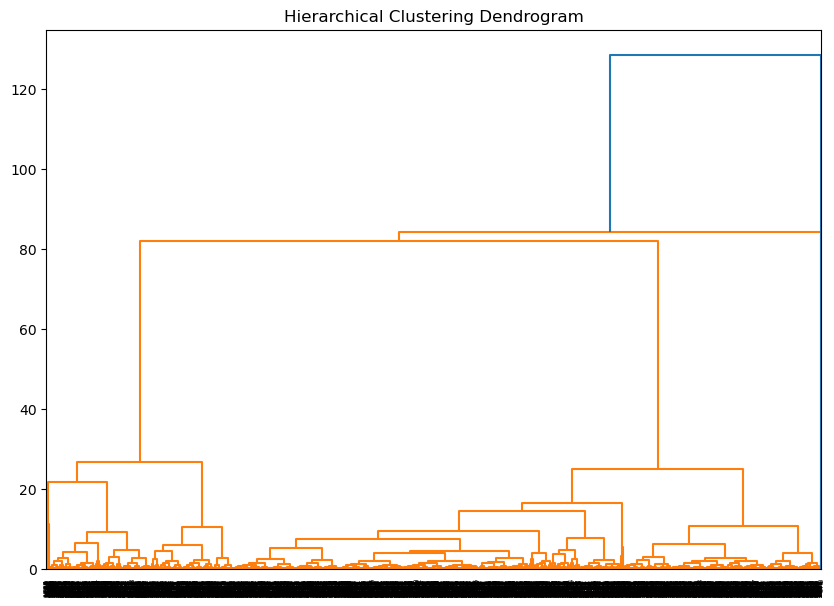

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(customer_df_reduced, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


from scipy.cluster.hierarchy import fcluster
clusters_hc = fcluster(linked, 5, criterion='maxclust')
customer_df['Cluster_HC'] = clusters_hc


In [16]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(customer_df_reduced)

customer_df['Cluster_DBSCAN'] = clusters_dbscan



In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(customer_df_reduced, method='ward')



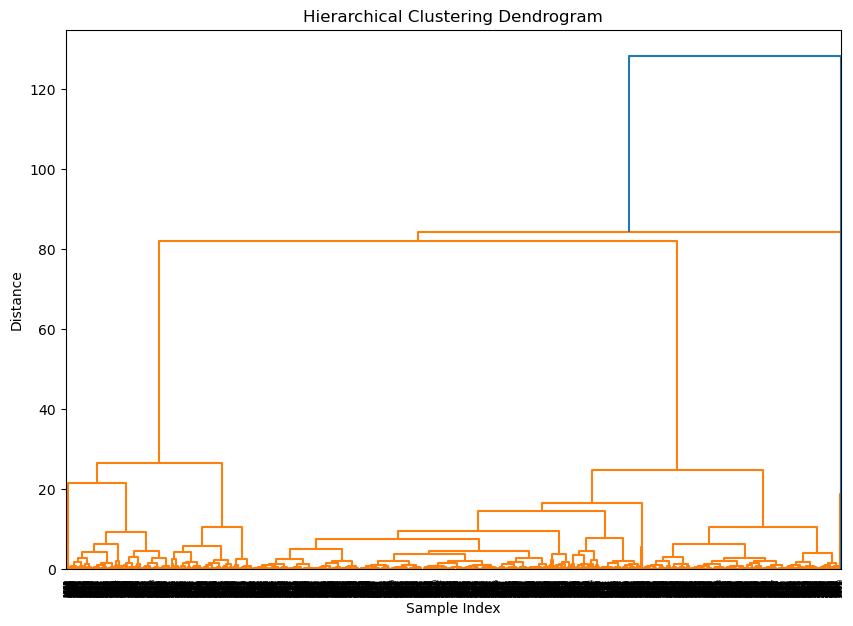

In [18]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


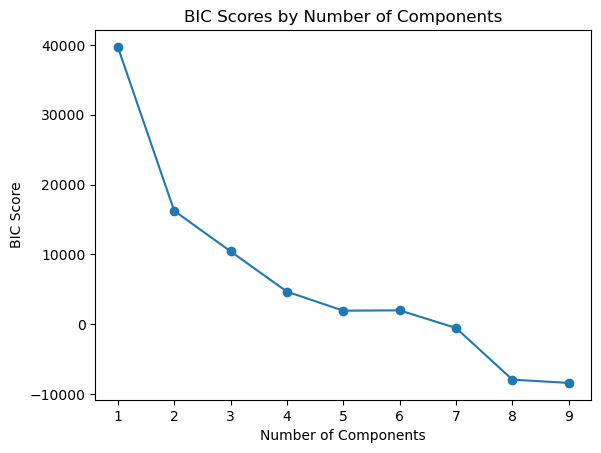

Optimal number of components: 9


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)  
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(customer_df_reduced)
    bic_scores.append(gmm.bic(customer_df_reduced))

# Plot BIC scores
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC Scores by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()

optimal_n_components = n_components_range[np.argmin(bic_scores)]
print(f"Optimal number of components: {optimal_n_components}")


In [20]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5)  # Adjust n_clusters based on your requirement
clusters_agglo = agglo.fit_predict(customer_df_reduced)

customer_df['Cluster_Agglo'] = clusters_agglo

# Evaluate with Silhouette Score
silhouette_agglo = silhouette_score(customer_df_reduced, clusters_agglo)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agglo}")


Silhouette Score for Agglomerative Clustering: 0.5722716159223014


In [21]:
from sklearn.cluster import AffinityPropagation

affinity = AffinityPropagation(random_state=42)
clusters_affinity = affinity.fit_predict(customer_df_reduced)

customer_df['Cluster_Affinity'] = clusters_affinity

# Evaluate with Silhouette Score
silhouette_affinity = silhouette_score(customer_df_reduced, clusters_affinity)
print(f"Silhouette Score for Affinity Propagation: {silhouette_affinity}")


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Silhouette Score for Affinity Propagation: 0.2590488783480315


In [22]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
clusters_mean_shift = mean_shift.fit_predict(customer_df_reduced)

customer_df['Cluster_MeanShift'] = clusters_mean_shift

# Evaluate with Silhouette Score
silhouette_mean_shift = silhouette_score(customer_df_reduced, clusters_mean_shift)
print(f"Silhouette Score for Mean Shift: {silhouette_mean_shift}")


Silhouette Score for Mean Shift: 0.36715688152452985


In [23]:
from scipy.cluster.hierarchy import fcluster


distance_threshold = 50  
clusters = fcluster(linked, distance_threshold, criterion='distance')

customer_df['Cluster_Labels'] = clusters


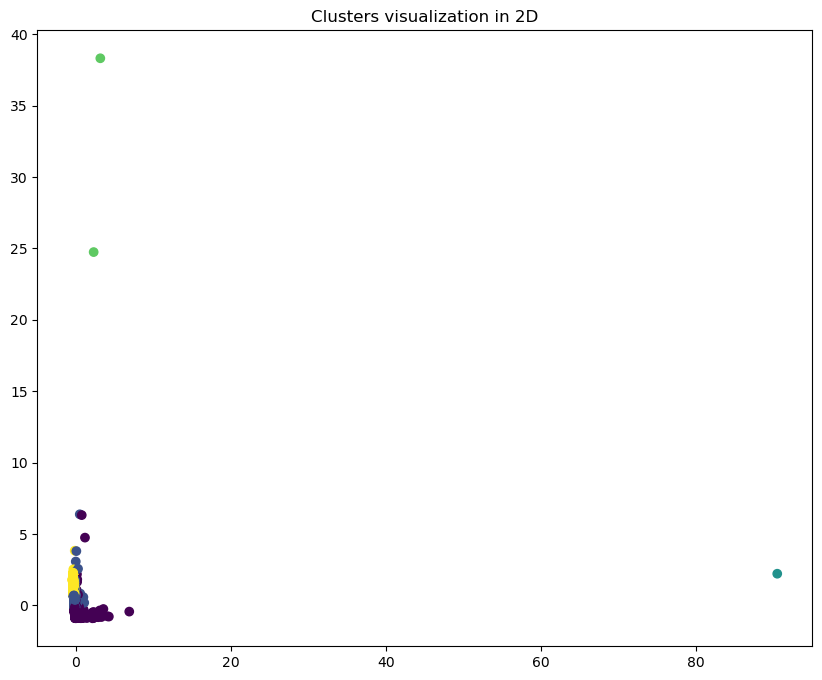

Silhouette Score for K-Means: 0.5357675602716819
Silhouette Score for Hierarchical Clustering: 0.5722716159223014


In [24]:
# For visualizing clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(customer_df_reduced[:, 0], customer_df_reduced[:, 1], c=customer_df['Cluster'], cmap='viridis')
plt.title('Clusters visualization in 2D')
plt.show()

# For calculating Silhouette Score for K-Means and Hierarchical Clustering
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(customer_df_reduced, customer_df['Cluster'])
silhouette_hc = silhouette_score(customer_df_reduced, customer_df['Cluster_HC'])

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hc}")


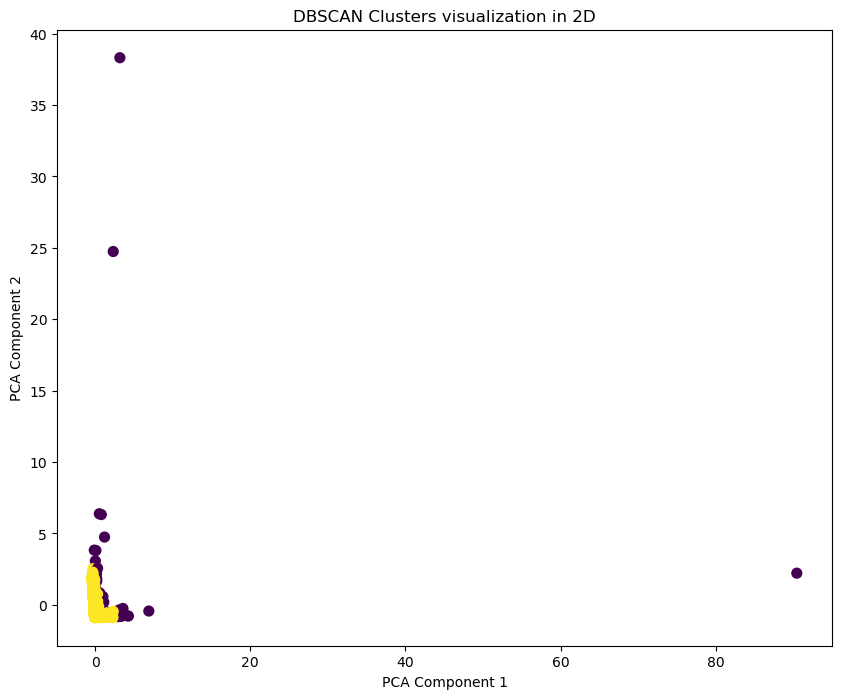

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(customer_df_reduced[:, 0], customer_df_reduced[:, 1], c=customer_df['Cluster_DBSCAN'], cmap='viridis', s=50)
plt.title('DBSCAN Clusters visualization in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


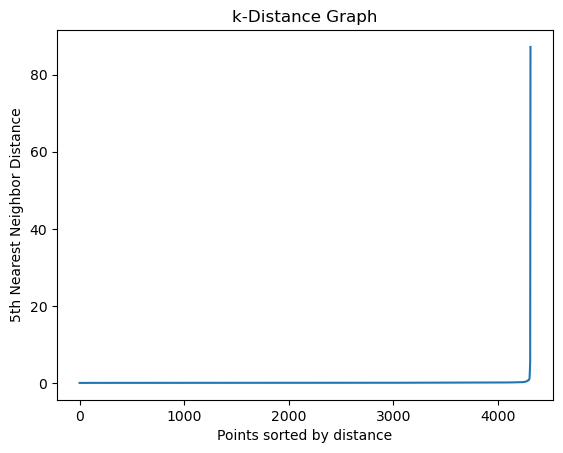

In [26]:
from sklearn.neighbors import NearestNeighbors

# Find the optimal eps value
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(customer_df_reduced)
distances, indices = neighbors.kneighbors(customer_df_reduced)
distances = np.sort(distances[:, -1])

plt.plot(distances)
plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()




In [27]:
from sklearn.cluster import DBSCAN

# Re-run DBSCAN with the identified eps value
dbscan = DBSCAN(eps=4200, min_samples=5)  # Using the elbow point value for eps
clusters_dbscan = dbscan.fit_predict(customer_df_reduced)

# Update your DataFrame with the new cluster assignments
customer_df['Cluster_DBSCAN'] = clusters_dbscan

# Count the number of clusters and noise points
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Calculate the Silhouette Score, excluding noise points
if n_clusters > 1:
    silhouette_dbscan = silhouette_score(customer_df_reduced[clusters_dbscan != -1], clusters_dbscan[clusters_dbscan != -1])
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
else:
    print("Not enough clusters for Silhouette Score.")


Estimated number of clusters: 1
Estimated number of noise points: 0
Not enough clusters for Silhouette Score.


In [28]:
from sklearn.metrics import silhouette_score

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(customer_df_reduced, customer_df['Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

# Silhouette Score for Hierarchical Clustering
silhouette_hc = silhouette_score(customer_df_reduced, customer_df['Cluster_HC'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hc}")

# Silhouette Score for DBSCAN (excluding noise points)
if len(set(customer_df['Cluster_DBSCAN'])) > 1:  # Ensure there's more than 1 cluster (excluding noise)
    silhouette_dbscan = silhouette_score(customer_df_reduced[customer_df['Cluster_DBSCAN'] != -1], customer_df['Cluster_DBSCAN'][customer_df['Cluster_DBSCAN'] != -1])
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
else:
    print("DBSCAN did not form distinct clusters, so Silhouette Score is not applicable.")

# Repeat the pattern for other clustering methods

# Silhouette Score for Agglomerative Clustering
silhouette_agglo = silhouette_score(customer_df_reduced, customer_df['Cluster_Agglo'])
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agglo}")

# Silhouette Score for Affinity Propagation
silhouette_affinity = silhouette_score(customer_df_reduced, customer_df['Cluster_Affinity'])
print(f"Silhouette Score for Affinity Propagation: {silhouette_affinity}")

# Silhouette Score for Mean Shift
silhouette_mean_shift = silhouette_score(customer_df_reduced, customer_df['Cluster_MeanShift'])
print(f"Silhouette Score for Mean Shift: {silhouette_mean_shift}")

# If you've applied GMM or other methods, calculate and print their scores similarly



Silhouette Score for K-Means: 0.5357675602716819
Silhouette Score for Hierarchical Clustering: 0.5722716159223014
DBSCAN did not form distinct clusters, so Silhouette Score is not applicable.
Silhouette Score for Agglomerative Clustering: 0.5722716159223014
Silhouette Score for Affinity Propagation: 0.2590488783480315
Silhouette Score for Mean Shift: 0.36715688152452985


Cluster centroids:
 [[ 5.95761958e-02 -4.19654959e-01  4.16947888e-01]
 [-1.30642556e-01  4.23710675e-01 -4.62035502e-01]
 [ 9.04366056e+01  2.22271852e+00 -6.70187658e+00]
 [ 2.75592449e+00  3.15270685e+01  2.77799708e+01]
 [-2.77432089e-01  1.37890982e+00 -1.50645194e+00]]


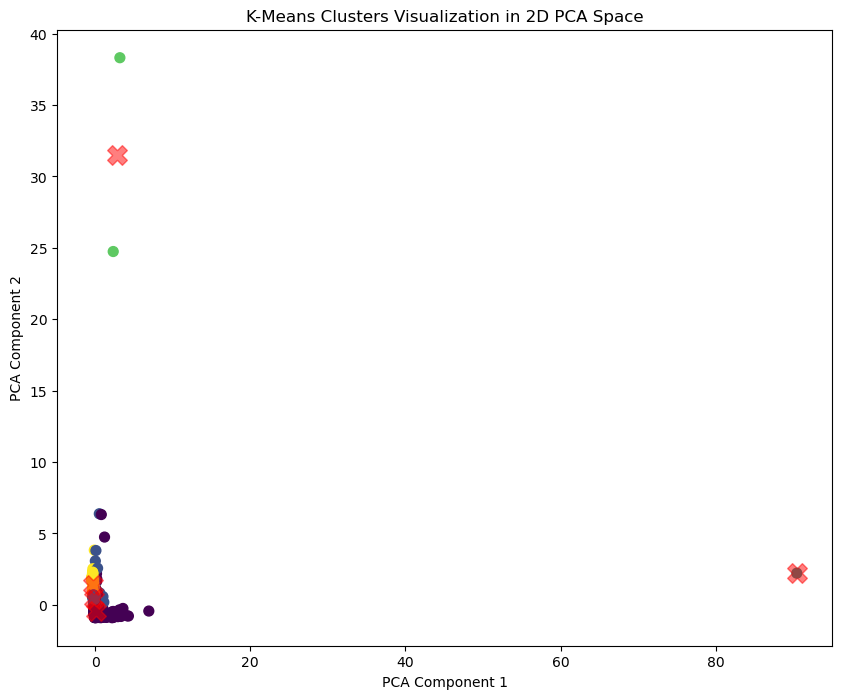


Cluster 0 characteristics:
         TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count   2905.000000        2905.000000  2905.000000         2905.000000
mean     388.932120           5.626162  4890.531842           72.985689
std      973.069841           9.607088    25.048241           74.570289
min        0.420000           1.000000  4858.000000            0.320000
25%       81.400000           2.000000  4869.000000           33.100000
50%      195.150000           3.000000  4885.000000           59.371429
75%      434.970000           6.000000  4910.000000           92.281667
max    31567.340000         205.000000  4952.000000         2000.496667

Cluster 1 characteristics:
        TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count   814.000000         814.000000   814.000000          814.000000
mean    170.249054           2.480344  5009.011057           69.835881
std     348.355261           2.852069    38.556884          100.385045
min       0.

In [29]:
# Cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster centroids:\n", centroids)

# Visualize clusters in 2D using the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(customer_df_reduced[:, 0], customer_df_reduced[:, 1], c=customer_df['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X')  # Mark centroids
plt.title('K-Means Clusters Visualization in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Characterize clusters by key features
for i in range(kmeans.n_clusters):
    cluster_members = customer_df[customer_df['Cluster'] == i]
    print(f"\nCluster {i} characteristics:")
    print(cluster_members[numeric_cols].describe())  # Summary statistics for numerical features in each cluster


Cluster 0
Size: Large (2904 members)
Total Spend: Moderate average spend, with a wide range, indicating a mix of spending behaviors.
Purchase Frequency: Moderate, suggesting occasional to regular purchasers.
Recency: A wider range in recency, with some customers not having purchased recently.
Average Basket Value: Varied, with some high-value purchases.
This cluster might represent a "General" segment with a broad mix of behaviors but leaning towards moderate spend and frequency.

Cluster 1
Size: Very small (1 member)
Total Spend: Extremely high, suggesting this might be an outlier or a very high-value customer.
Purchase Frequency: Extremely high, indicating frequent transactions.
Recency: Purchased very recently.
Average Basket Value: High.
Given its size, this cluster could be an "Outlier" or "High-Value" segment, possibly representing bulk purchases or institutional buying.

Cluster 2
Size: Medium (815 members)
Total Spend: Lower average spend, indicating smaller transactions.
Purchase Frequency: Lower, suggesting less frequent purchases.
Recency: More recent purchases.
Average Basket Value: Moderate, with some higher-value baskets.
This cluster might be "Occasional Shoppers" with recent, less frequent, and smaller transactions.

Cluster 3
Size: Very small (2 members)
Total Spend: High, likely indicating significant transactions.
Purchase Frequency: Very low, suggesting one-off or rare purchases.
Recency: Least recent purchasers.
Average Basket Value: Extremely high, suggesting premium or bulk purchases.
Like Cluster 1, this is likely an "Outlier" or "Premium" segment, possibly representing large, infrequent transactions.

Cluster 4
Size: Medium (591 members)
Total Spend: Low, indicating smaller transaction sizes.
Purchase Frequency: Low, suggesting infrequent purchases.
Recency: Least recent, indicating a lapse since the last purchase.
Average Basket Value: Relatively low, consistent with smaller, infrequent transactions.

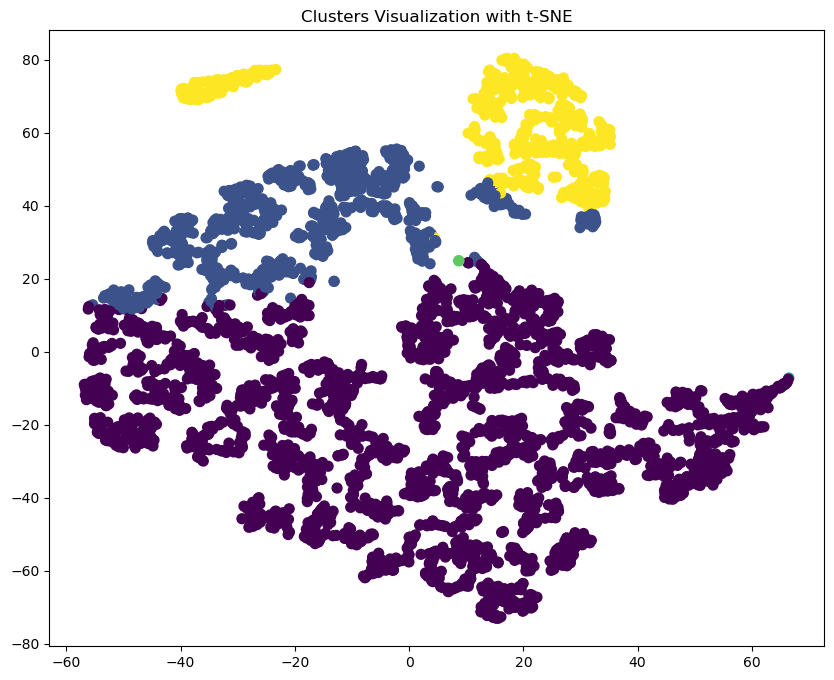

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
customer_df_tsne = tsne.fit_transform(customer_df_reduced)

plt.figure(figsize=(10, 8))
plt.scatter(customer_df_tsne[:, 0], customer_df_tsne[:, 1], c=customer_df['Cluster'], cmap='viridis', s=50)
plt.title('Clusters Visualization with t-SNE')
plt.show()


In [31]:
# Profiling each cluster
for i in range(kmeans.n_clusters):
    cluster_members = customer_df[customer_df['Cluster'] == i]
    print(f"\nProfile for Cluster {i}:")
    display(cluster_members.describe())  # Summary statistics for numerical features in each cluster



Profile for Cluster 0:


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_Agglo,Cluster_Affinity,Cluster_MeanShift,Cluster_Labels
count,2905.000000,2905.000000,2905.000000,2905.000000,2905.0,2905.000000,2905.0,2905.000000,2905.000000,2905.000000,2905.000000
mean,388.932120,5.626162,4890.531842,72.985689,0.0,2.005508,0.0,0.002754,47.139759,0.028916,2.002754
std,973.069841,9.607088,25.048241,74.570289,0.0,0.104828,0.0,0.052414,24.833337,0.313588,0.052414
min,0.420000,1.000000,4858.000000,0.320000,0.0,2.000000,0.0,0.000000,1.000000,0.000000,2.000000
25%,81.400000,2.000000,4869.000000,33.100000,0.0,2.000000,0.0,0.000000,25.000000,0.000000,2.000000
50%,195.150000,3.000000,4885.000000,59.371429,0.0,2.000000,0.0,0.000000,52.000000,0.000000,2.000000
75%,434.970000,6.000000,4910.000000,92.281667,0.0,2.000000,0.0,0.000000,68.000000,0.000000,2.000000
max,31567.340000,205.000000,4952.000000,2000.496667,0.0,4.000000,0.0,1.000000,83.000000,9.000000,3.000000



Profile for Cluster 1:


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_Agglo,Cluster_Affinity,Cluster_MeanShift,Cluster_Labels
count,814.000000,814.000000,814.000000,814.000000,814.0,814.000000,814.0,814.000000,814.000000,814.000000,814.000000
mean,170.249054,2.480344,5009.011057,69.835881,1.0,3.078624,0.0,0.539312,42.604423,0.377150,2.539312
std,348.355261,2.852069,38.556884,100.385045,0.0,0.997517,0.0,0.498759,26.196218,2.155463,0.498759
min,0.190000,1.000000,4949.000000,0.190000,1.0,2.000000,0.0,0.000000,5.000000,0.000000,2.000000
25%,40.772500,1.000000,4972.000000,24.222500,1.0,2.000000,0.0,0.000000,19.000000,0.000000,2.000000
50%,87.675000,2.000000,5007.000000,48.455000,1.0,4.000000,0.0,1.000000,35.000000,0.000000,3.000000
75%,182.597500,3.000000,5042.000000,87.045000,1.0,4.000000,0.0,1.000000,75.000000,0.000000,3.000000
max,6275.450000,46.000000,5077.000000,1855.250000,1.0,4.000000,0.0,1.000000,82.000000,13.000000,3.000000



Profile for Cluster 2:


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_Agglo,Cluster_Affinity,Cluster_MeanShift,Cluster_Labels
count,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,832442.7,1739.0,4858.0,478.690454,2.0,5.0,0.0,3.0,0.0,4.0,4.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,832442.7,1739.0,4858.0,478.690454,2.0,5.0,0.0,3.0,0.0,4.0,4.0
25%,832442.7,1739.0,4858.0,478.690454,2.0,5.0,0.0,3.0,0.0,4.0,4.0
50%,832442.7,1739.0,4858.0,478.690454,2.0,5.0,0.0,3.0,0.0,4.0,4.0
75%,832442.7,1739.0,4858.0,478.690454,2.0,5.0,0.0,3.0,0.0,4.0,4.0
max,832442.7,1739.0,4858.0,478.690454,2.0,5.0,0.0,3.0,0.0,4.0,4.0



Profile for Cluster 3:


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_Agglo,Cluster_Affinity,Cluster_MeanShift,Cluster_Labels
count,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.0,2.0,2.000000,2.000000,2.0
mean,12434.920000,1.500000,5121.000000,8955.835000,3.0,1.0,0.0,2.0,35.500000,6.500000,1.0
std,2095.044256,0.707107,2.828427,2825.124936,0.0,0.0,0.0,0.0,31.819805,0.707107,0.0
min,10953.500000,1.000000,5119.000000,6958.170000,3.0,1.0,0.0,2.0,13.000000,6.000000,1.0
25%,11694.210000,1.250000,5120.000000,7957.002500,3.0,1.0,0.0,2.0,24.250000,6.250000,1.0
50%,12434.920000,1.500000,5121.000000,8955.835000,3.0,1.0,0.0,2.0,35.500000,6.500000,1.0
75%,13175.630000,1.750000,5122.000000,9954.667500,3.0,1.0,0.0,2.0,46.750000,6.750000,1.0
max,13916.340000,2.000000,5123.000000,10953.500000,3.0,1.0,0.0,2.0,58.000000,7.000000,1.0



Profile for Cluster 4:


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_Agglo,Cluster_Affinity,Cluster_MeanShift,Cluster_Labels
count,591.000000,591.000000,591.000000,591.000000,591.0,591.000000,591.0,591.000000,591.000000,591.000000,591.0
mean,84.134355,1.433164,5147.175973,61.011073,4.0,3.236887,0.0,3.289340,56.165821,5.776650,3.0
std,100.441825,0.969982,46.685128,56.635770,0.0,0.425532,0.0,1.276597,20.352060,6.804848,0.0
min,0.250000,1.000000,5079.000000,0.250000,4.0,3.000000,0.0,1.000000,15.000000,0.000000,3.0
25%,27.805000,1.000000,5110.000000,22.945000,4.0,3.000000,0.0,4.000000,48.000000,0.000000,3.0
50%,56.290000,1.000000,5139.000000,45.910000,4.0,3.000000,0.0,4.000000,60.000000,0.000000,3.0
75%,108.205000,1.000000,5177.000000,84.255000,4.0,3.000000,0.0,4.000000,70.000000,14.000000,3.0
max,1248.130000,8.000000,5231.000000,624.065000,4.0,4.000000,0.0,4.000000,84.000000,14.000000,3.0


In [32]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Davies-Bouldin Index
db_index = davies_bouldin_score(customer_df_reduced, customer_df['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(customer_df_reduced, customer_df['Cluster'])
print(f"Calinski-Harabasz Index: {ch_index}")


Davies-Bouldin Index: 0.4775927637670844
Calinski-Harabasz Index: 11375.586673894037


In [33]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(customer_df_reduced):
    # Split data
    X_train, X_test = customer_df_reduced[train_index], customer_df_reduced[test_index]
    
    kmeans_cv = KMeans(n_clusters=5, random_state=42)
    kmeans_cv.fit(X_train)
    
    test_clusters = kmeans_cv.predict(X_test)
    
    silhouette_cv = silhouette_score(X_test, test_clusters)
    print(f"Silhouette Score on test split: {silhouette_cv}")


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score on test split: 0.5410304977133289


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score on test split: 0.5442417044423641


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score on test split: 0.5099414430104038


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score on test split: 0.5290038789932473


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score on test split: 0.5457261267290806


Next Steps:
Given these encouraging validation metrics, you might consider the following actions:

Deep Dive into Cluster Characteristics: You have a good foundation to explore each cluster in more detail. This might involve analyzing the central tendencies (mean, median) and distributions of key features within each cluster to derive actionable insights or hypotheses about each segment.

Leverage Clusters in Decision Making: With well-defined clusters, you can consider how these segments might inform business decisions, marketing strategies, product development, or customer service enhancements. Each cluster can represent a distinct segment of your dataset with unique characteristics.

Refine Clustering if Necessary: While the metrics suggest good clustering, there's always room for refinement. You might explore:

Varying the number of clusters to see if a different number provides more insightful segmentation.
Using cluster analysis as a feature in further modeling, such as predictive modeling to anticipate customer behavior.
Revisiting preprocessing steps or considering additional features that might influence clustering.
Stakeholder Communication: Prepare to communicate your findings to stakeholders. This might involve preparing visualizations, detailed reports, or presentations that summarize the clustering process, the characteristics of each cluster, and potential implications or action points based on the clusters.

Iterative Improvement: Consider clustering an iterative process. Feedback from stakeholders, changes in the underlying data, or new business questions might necessitate revisiting and refining your clustering approach.

The strong clustering validation metrics you've achieved provide a solid basis for these next steps, allowing you to proceed with confidence in the robustness and relevance of your clustering results.


--- Profile for Cluster 0 ---


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue
count,2905.00,2905.00,2905.00,2905.00
mean,388.93,5.63,4890.53,72.99
std,973.07,9.61,25.05,74.57
min,0.42,1.00,4858.00,0.32
25%,81.40,2.00,4869.00,33.10
50%,195.15,3.00,4885.00,59.37
75%,434.97,6.00,4910.00,92.28
max,31567.34,205.00,4952.00,2000.50


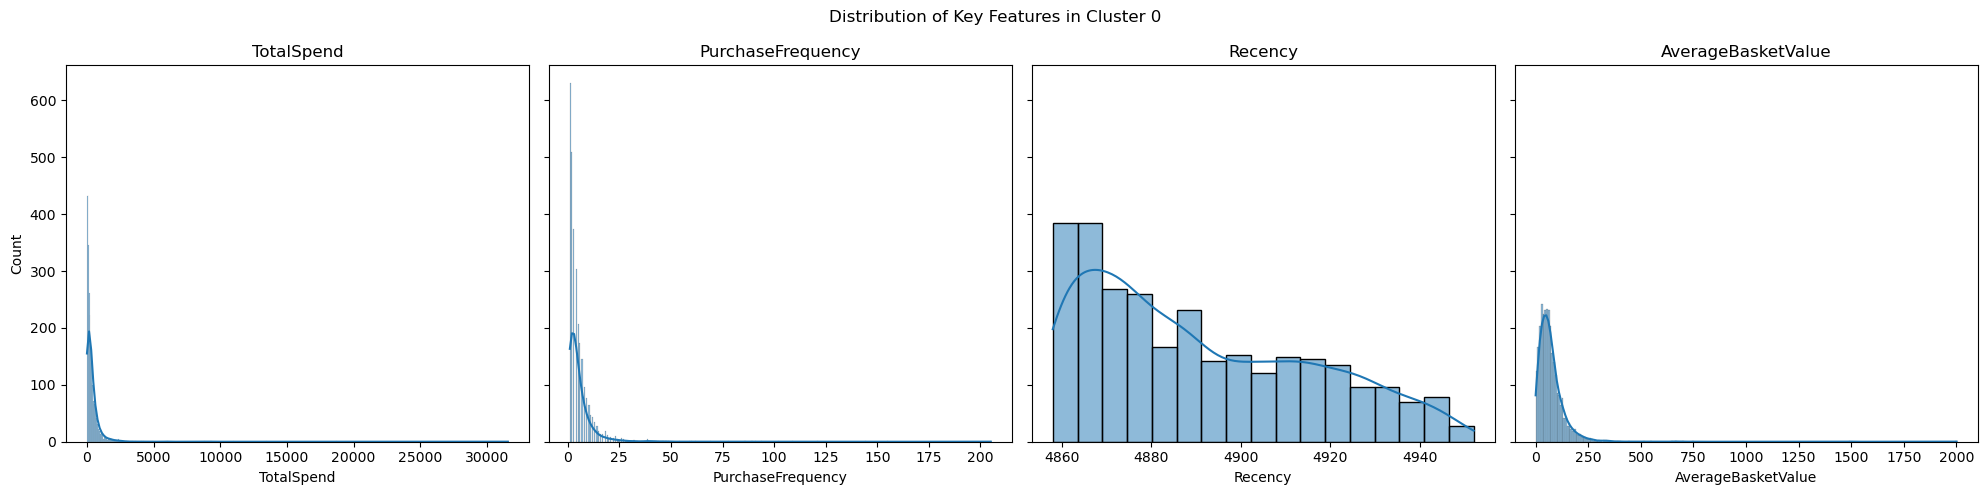


--- Profile for Cluster 1 ---


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue
count,814.00,814.00,814.00,814.00
mean,170.25,2.48,5009.01,69.84
std,348.36,2.85,38.56,100.39
min,0.19,1.00,4949.00,0.19
25%,40.77,1.00,4972.00,24.22
50%,87.68,2.00,5007.00,48.46
75%,182.60,3.00,5042.00,87.04
max,6275.45,46.00,5077.00,1855.25


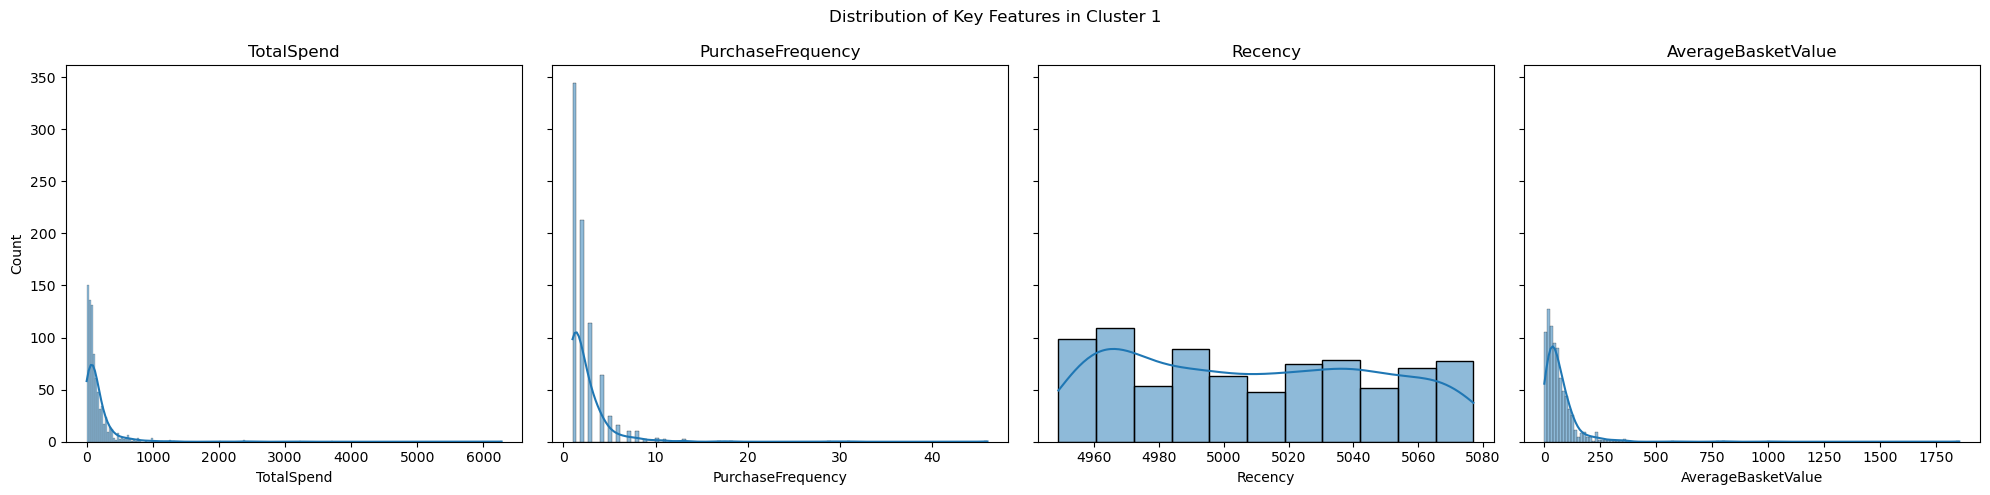


--- Profile for Cluster 2 ---


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue
count,1.0,1.0,1.0,1.00
mean,832442.7,1739.0,4858.0,478.69
std,NaN,NaN,NaN,NaN
min,832442.7,1739.0,4858.0,478.69
25%,832442.7,1739.0,4858.0,478.69
50%,832442.7,1739.0,4858.0,478.69
75%,832442.7,1739.0,4858.0,478.69
max,832442.7,1739.0,4858.0,478.69


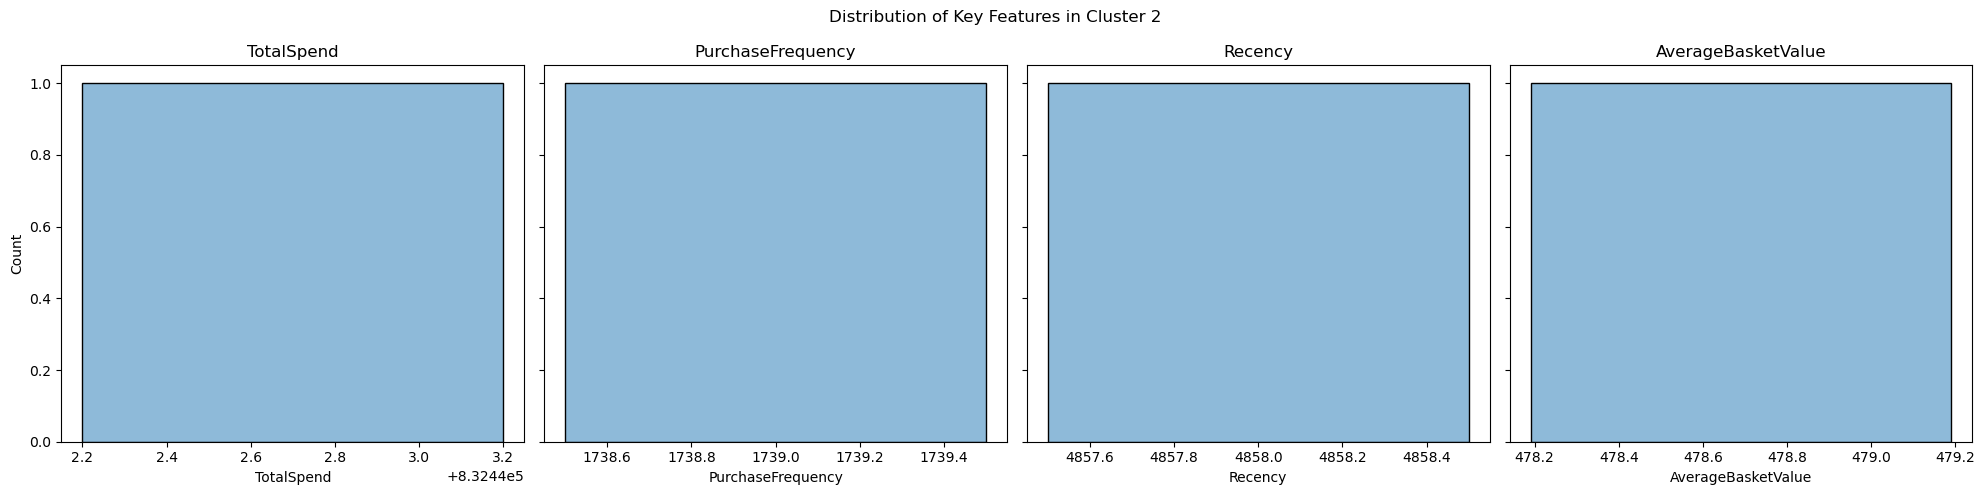


--- Profile for Cluster 3 ---


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue
count,2.00,2.00,2.00,2.00
mean,12434.92,1.50,5121.00,8955.83
std,2095.04,0.71,2.83,2825.12
min,10953.50,1.00,5119.00,6958.17
25%,11694.21,1.25,5120.00,7957.00
50%,12434.92,1.50,5121.00,8955.83
75%,13175.63,1.75,5122.00,9954.67
max,13916.34,2.00,5123.00,10953.50


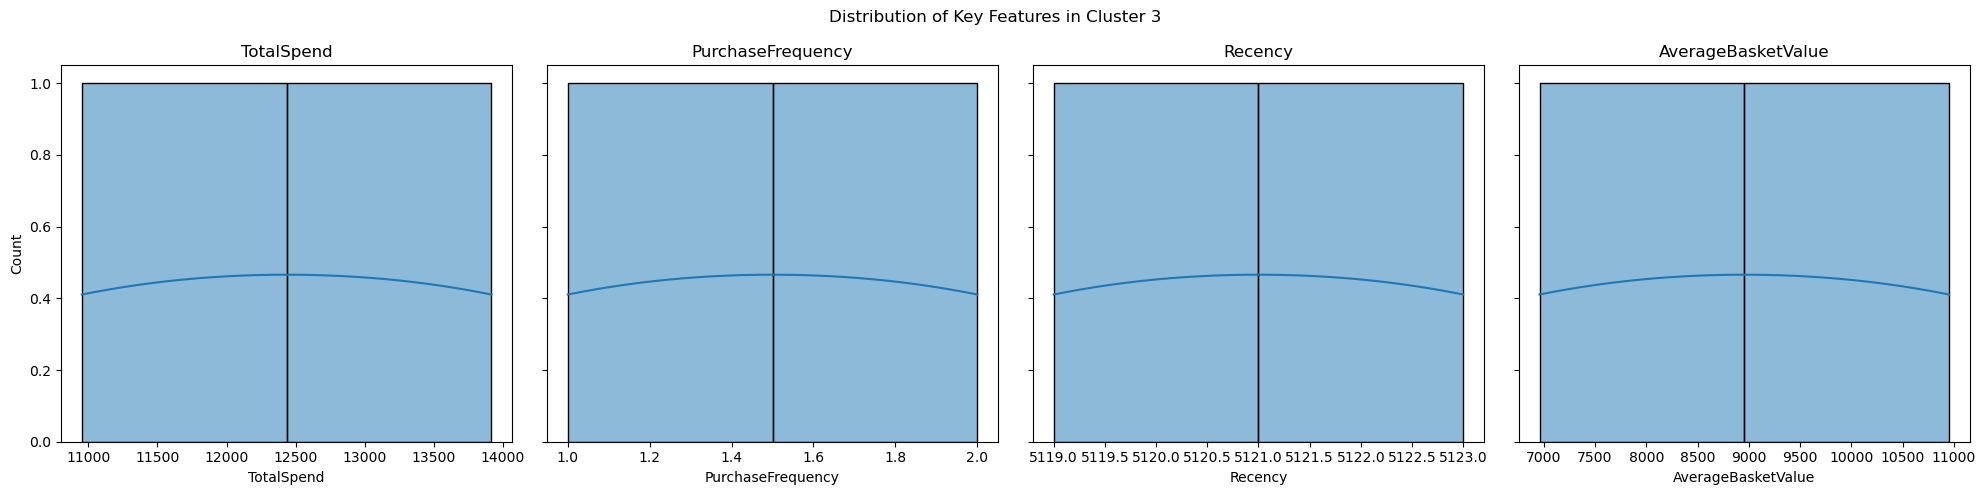


--- Profile for Cluster 4 ---


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue
count,591.00,591.00,591.00,591.00
mean,84.13,1.43,5147.18,61.01
std,100.44,0.97,46.69,56.64
min,0.25,1.00,5079.00,0.25
25%,27.80,1.00,5110.00,22.94
50%,56.29,1.00,5139.00,45.91
75%,108.20,1.00,5177.00,84.26
max,1248.13,8.00,5231.00,624.06


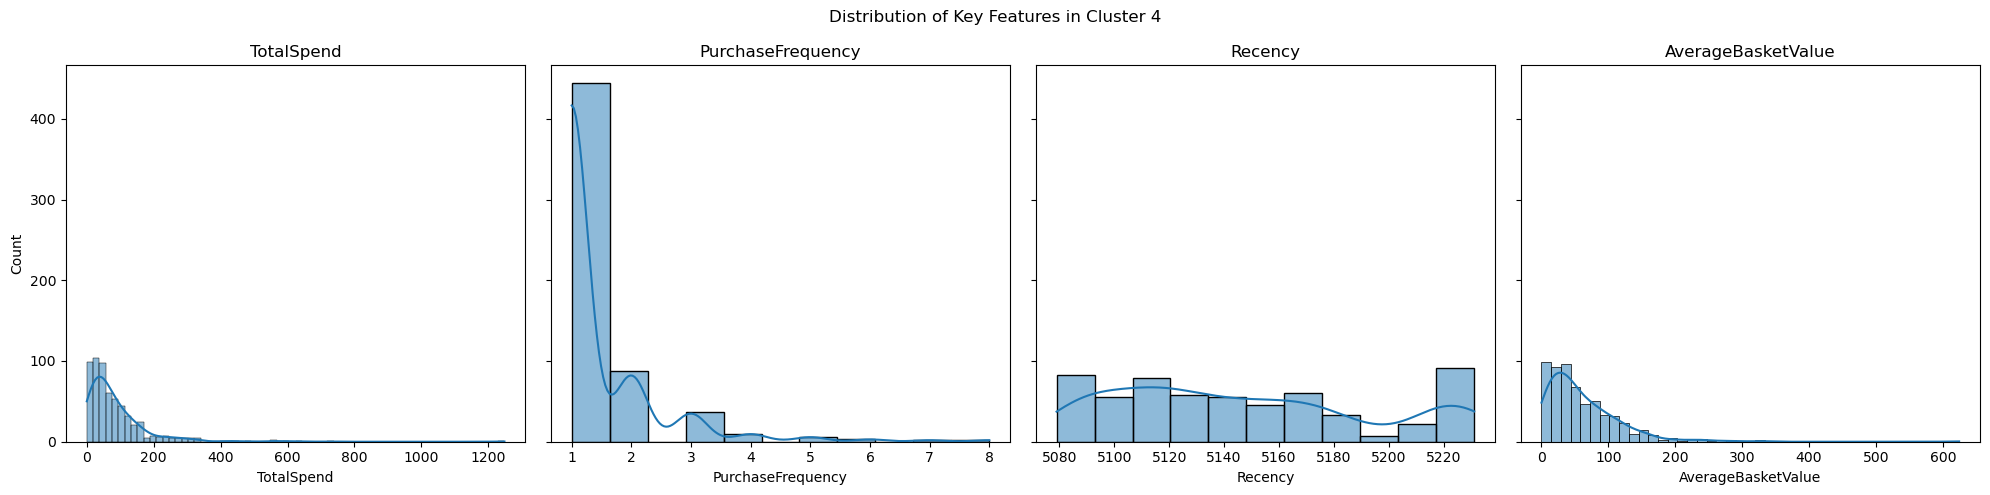

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

key_features = ['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']

for i in range(customer_df['Cluster'].nunique()):
    print(f"\n--- Profile for Cluster {i} ---")
    cluster_data = customer_df[customer_df['Cluster'] == i]

    display(cluster_data[key_features].describe().round(2))
    
    fig, axes = plt.subplots(1, len(key_features), figsize=(20, 5), sharey=True)
    fig.suptitle(f'Distribution of Key Features in Cluster {i}')

    for ax, feature in zip(axes, key_features):
        sns.histplot(cluster_data[feature], kde=True, ax=ax)
        ax.set_title(feature)

    plt.tight_layout()
    plt.show()


In [36]:
print(customer_df.columns)


Index(['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue',
       'Cluster', 'Cluster_HC', 'Cluster_DBSCAN', 'Cluster_Agglo',
       'Cluster_Affinity', 'Cluster_MeanShift', 'Cluster_Labels'],
      dtype='object')


In [45]:
# Number of clusters
n_clusters = customer_df['Cluster'].nunique()

# Analyze average spend and other metrics for each cluster
for i in range(n_clusters):
    cluster_data = customer_df[customer_df['Cluster'] == i]
    
    # Calculate average spend and other key metrics
    average_spend = cluster_data['TotalSpend'].mean()
    average_frequency = cluster_data['PurchaseFrequency'].mean()
    average_recency = cluster_data['Recency'].mean()
    average_basket_value = cluster_data['AverageBasketValue'].mean()

    print(f"\n--- Cluster {i} Insights ---")
    print(f"Average Spend: {average_spend:.2f}")
    print(f"Average Purchase Frequency: {average_frequency:.2f}")
    print(f"Average Recency: {average_recency:.2f} days ago")
    print(f"Average Basket Value: {average_basket_value:.2f}")

    # Tailoring offers based on the calculated metrics
    # This is a simplified example. In practice, this could involve more sophisticated segmentation and targeting strategies
    if average_spend > customer_df['TotalSpend'].quantile(0.75):
        print("Action: Consider premium offers or loyalty programs for high spenders.")
    elif average_frequency > customer_df['PurchaseFrequency'].quantile(0.75):
        print("Action: Reward frequent shoppers with a loyalty program or exclusive deals.")
    elif average_recency > customer_df['Recency'].quantile(0.75):
        print("Action: Re-engage customers who haven't shopped recently with a 'We Miss You' campaign.")
    else:
        print("Action: Engage with standard promotions and aim to increase the basket value.")



--- Cluster 0 Insights ---
Average Spend: 388.93
Average Purchase Frequency: 5.63
Average Recency: 4890.53 days ago
Average Basket Value: 72.99
Action: Consider premium offers or loyalty programs for high spenders.

--- Cluster 1 Insights ---
Average Spend: 170.25
Average Purchase Frequency: 2.48
Average Recency: 5009.01 days ago
Average Basket Value: 69.84
Action: Re-engage customers who haven't shopped recently with a 'We Miss You' campaign.

--- Cluster 2 Insights ---
Average Spend: 832442.70
Average Purchase Frequency: 1739.00
Average Recency: 4858.00 days ago
Average Basket Value: 478.69
Action: Consider premium offers or loyalty programs for high spenders.

--- Cluster 3 Insights ---
Average Spend: 12434.92
Average Purchase Frequency: 1.50
Average Recency: 5121.00 days ago
Average Basket Value: 8955.83
Action: Consider premium offers or loyalty programs for high spenders.

--- Cluster 4 Insights ---
Average Spend: 84.13
Average Purchase Frequency: 1.43
Average Recency: 5147.18 d

In [40]:
# Filter Cluster 0
cluster_0 = customer_df[customer_df['Cluster'] == 0]

# Analyze Cluster 0
print("General Shopper Characteristics:")
print(cluster_0[['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']].describe())

# Possible Actions: General Engagement and Upselling
# Since we don't have product-specific data, consider actions based on overall spending and purchasing behavior

# Identify customers with high TotalSpend for potential upselling
high_spend_customers = cluster_0[cluster_0['TotalSpend'] > cluster_0['TotalSpend'].quantile(0.75)]
print(f"\nNumber of High Spend Customers in Cluster 0: {len(high_spend_customers)}")




General Shopper Characteristics:
         TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count   2905.000000        2905.000000  2905.000000         2905.000000
mean     388.932120           5.626162  4890.531842           72.985689
std      973.069841           9.607088    25.048241           74.570289
min        0.420000           1.000000  4858.000000            0.320000
25%       81.400000           2.000000  4869.000000           33.100000
50%      195.150000           3.000000  4885.000000           59.371429
75%      434.970000           6.000000  4910.000000           92.281667
max    31567.340000         205.000000  4952.000000         2000.496667

Number of High Spend Customers in Cluster 0: 726


In [41]:
# Filter Cluster 1
cluster_1 = customer_df[customer_df['Cluster'] == 1]

# Analyze Cluster 1
print("Occasional Shopper Characteristics:")
print(cluster_1[['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']].describe())

# Possible Action: Timely offers and new product alerts


Occasional Shopper Characteristics:
        TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count   814.000000         814.000000   814.000000          814.000000
mean    170.249054           2.480344  5009.011057           69.835881
std     348.355261           2.852069    38.556884          100.385045
min       0.190000           1.000000  4949.000000            0.190000
25%      40.772500           1.000000  4972.000000           24.222500
50%      87.675000           2.000000  5007.000000           48.455000
75%     182.597500           3.000000  5042.000000           87.045000
max    6275.450000          46.000000  5077.000000         1855.250000


In [42]:
# Filter Cluster 2
cluster_2 = customer_df[customer_df['Cluster'] == 2]

# Analyze Cluster 2
print("High Roller Characteristics:")
print(cluster_2[['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']].describe())

# Possible Action: Personalized high-touch engagement
# For such valuable customers, consider developing personalized engagement plans, possibly involving account managers or customer success teams


High Roller Characteristics:
       TotalSpend  PurchaseFrequency  Recency  AverageBasketValue
count         1.0                1.0      1.0            1.000000
mean     832442.7             1739.0   4858.0          478.690454
std           NaN                NaN      NaN                 NaN
min      832442.7             1739.0   4858.0          478.690454
25%      832442.7             1739.0   4858.0          478.690454
50%      832442.7             1739.0   4858.0          478.690454
75%      832442.7             1739.0   4858.0          478.690454
max      832442.7             1739.0   4858.0          478.690454


In [43]:
# Filter Cluster 3
cluster_3 = customer_df[customer_df['Cluster'] == 3]

# Analyze Cluster 3
print("Bulk Buyer Characteristics:")
print(cluster_3[['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']].describe())

# Possible Action: Tailored offers and volume discounts
# For example, you could analyze the bulk products they tend to buy and offer volume discounts on those items


Bulk Buyer Characteristics:
         TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count      2.000000           2.000000     2.000000            2.000000
mean   12434.920000           1.500000  5121.000000         8955.835000
std     2095.044256           0.707107     2.828427         2825.124936
min    10953.500000           1.000000  5119.000000         6958.170000
25%    11694.210000           1.250000  5120.000000         7957.002500
50%    12434.920000           1.500000  5121.000000         8955.835000
75%    13175.630000           1.750000  5122.000000         9954.667500
max    13916.340000           2.000000  5123.000000        10953.500000


In [44]:
# Filter Cluster 4
cluster_4 = customer_df[customer_df['Cluster'] == 4]

# Analyze Cluster 4
print("Infrequent Shopper Characteristics:")
print(cluster_4[['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']].describe())

# Possible Action: Re-engagement campaigns
# Develop win-back campaigns targeting this cluster, perhaps offering a special discount or highlighting new products since their last purchase


Infrequent Shopper Characteristics:
        TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count   591.000000         591.000000   591.000000          591.000000
mean     84.134355           1.433164  5147.175973           61.011073
std     100.441825           0.969982    46.685128           56.635770
min       0.250000           1.000000  5079.000000            0.250000
25%      27.805000           1.000000  5110.000000           22.945000
50%      56.290000           1.000000  5139.000000           45.910000
75%     108.205000           1.000000  5177.000000           84.255000
max    1248.130000           8.000000  5231.000000          624.065000
